### Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading and Reading the Dataset

In [2]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


#### Understanding the structure of the datsaset

In [3]:
# shape Helps to find the dimensionality ofthe dataset by returning a tuple
df.shape

(607, 12)

#### Checking the missing values present in the dataset

In [4]:
# isnull() helps to detect all null values present in the dataset by returning a bool value.
# with sum() we can add all the detected null values and present them.
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

#### Geting information about the dataset

In [5]:
# info() function helps to present  the summarised information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


##### Deleting the unrequired column

In [6]:
# drop() helps to delete the column in dataset
df = df.drop(['Unnamed: 0'],axis=1)

#### Getting list of Unique values

In [7]:
dict = {}
for col in df.columns:
    dict[col]=len(df[col].unique())

pd.DataFrame(dict,index=['Unique_Values']).transpose()

,Unique_Values
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3
company_location,50


#### Getting the statistical information of the dataset

In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


##### WHAT I FOUND UP TILL NOW :

1. Dimension of the dataset are : (607,12). It means there are 607 rows and 12 columns present in the dataset.
2. Luckily, we have no missing or null values present.
3. With the help of info(), We can conclude that in the dataset. Majority of columns are categorical values
4. There are 50 job titles, lets further analyze them and see can we group them. This same goes with employee_residence and company location
##### CATEGORICAL COLUMNS
##### Work Year
    Experience Level
    Employement Type
    Job Title
    Salary Currency
    Employee Residence
    Company Size
    Company Location
    Remote Ratio

##### NUMERTICAL COLUMNS
    Salary
    Salary in USD

##### Exploring Job title & employee residence column

In [9]:
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

After Viewing all job titles. Majority of the title are occuring very low
we can divide them into 5 categories:
1. Data Scientist
2. Data Engineer
3. Data Analyst
4. Machine Learning Engineer
5. Manager

In [10]:
dum = df.job_title.str.contains('Machine Learning')
df.loc[dum,'New_Job_Title']='Machine Learning Engineer'

dum = df.job_title.str.contains('Data Scientist')
df.loc[dum,'New_Job_Title']='Data Scientist'

dum = df.job_title.str.contains('Machine Learning')
df.loc[dum,'New_Job_Title']='Machine Learning Engineer'

dum = df.job_title.str.contains('Data Analyst')
df.loc[dum,'New_Job_Title']='Data Analyst'

dum = df.job_title.str.contains('Data Engineer')
df.loc[dum,'New_Job_Title']='Data Engineer'

dum = df.job_title.str.contains('Manager')
df.loc[dum,'New_Job_Title']='Manager'

checking the null values

In [11]:
df.New_Job_Title.isnull().sum()

90

checking which job title didnt get merged

In [12]:
df1 = df[(df.New_Job_Title != 'Machine Learning Engineer') & (df.New_Job_Title != 'Data Scientist') & (df.New_Job_Title != 'Data Analyst') & (df.New_Job_Title != 'Data Engineer') & (df.New_Job_Title != 'Manager')]

In [13]:
df1.job_title.value_counts()

Research Scientist                   16
Data Architect                       11
Data Science Consultant               7
AI Scientist                          7
Director of Data Science              7
ML Engineer                           6
Computer Vision Engineer              6
Head of Data                          5
Head of Data Science                  4
Analytics Engineer                    4
Data Analytics Engineer               4
Computer Vision Software Engineer     3
Data Science Engineer                 3
ETL Developer                         2
Data Specialist                       1
Big Data Architect                    1
3D Computer Vision Researcher         1
NLP Engineer                          1
Data Analytics Lead                   1
Name: job_title, dtype: int64

Including all the left values to get merged in the new_job_title

In [17]:
dum = df.job_title.str.contains('Reaearch Scientist')
df.loc[dum,'New_Job_Title']='Data Scientist'

mask = df.job_title.str.contains('AI Scientist')
df.loc[mask, 'New_Job_Title'] = 'Data Scientist'

dum = df.job_title.str.contains('Data Science Consultant')
df.loc[dum,'New_Job_Title']='Data Scientist'


dum = df.job_title.str.contains('Director')
df.loc[dum,'New_Job_Title']='Manager'

dum = df.job_title.str.contains('Lead')
df.loc[dum,'New_Job_Title']='Manager'

dum = df.job_title.str.contains('Head')
df.loc[dum,'New_Job_Title']='Manager'


dum = df.job_title.str.contains('Data Architect')
df.loc[dum, 'New_Job_Title'] = 'Data Engineer'

dum = df.job_title.str.contains('Data Science Engineer')
df.loc[dum, 'New_Job_Title'] = 'Data Engineer'

dum = df.job_title.str.contains('Data Analytics Engineer')
df.loc[dum, 'New_Job_Title'] = 'Data Engineer'

dum = df.job_title.str.contains('Big Data Architect')
df.loc[dum, 'New_Job_Title'] = 'Data Engineer'

dum = df.job_title.str.contains('Analytics Engineer')
df.loc[dum, 'New_Job_Title'] = 'Data Engineer'


dum = df.job_title.str.contains('ML Engineer')
df.loc[dum, 'New_Job_Title'] = 'Machine Learning Engineer'

dum = df.job_title.str.contains('Computer Vision Engineer')
df.loc[dum, 'New_Job_Title'] = 'Machine Learning Engineer'

dum = df.job_title.str.contains('NLP Engineer')
df.loc[dum, 'New_Job_Title'] = 'Machine Learning Engineer'


dum = df.job_title.str.contains('Computer Vision Software Engineer')
df.loc[dum, 'New_Job_Title'] = 'Others'

dum = df.job_title.str.contains('ETL Developer')
df.loc[dum, 'New_Job_Title'] = 'Others'

dum = df.job_title.str.contains('3D Computer Vision Researcher')
df.loc[dum, 'New_Job_Title'] = 'Others'

dum = df.job_title.str.contains('Data Specialist')
df.loc[dum, 'New_Job_Title'] = 'Others'

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,New_Job_Title
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Machine Learning Engineer
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Data Engineer
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Machine Learning Engineer


We dont need previous job_title

In [18]:
df = df.drop(['job_title'],axis =1)

In [19]:
df = df.rename(columns={'New_Job_Title':'job_title'})

Updated Job title column. now we can categorize them easliy

In [20]:
df.job_title.value_counts()

Data Scientist               170
Data Engineer                168
Data Analyst                 116
Machine Learning Engineer     72
Manager                       58
Others                         7
Name: job_title, dtype: int64

In [21]:
df.employee_residence.value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

we can see there is same pattern as in job title. lets sort it out by changing it to 'others'

In [22]:
df.loc[df['employee_residence'].map(df['employee_residence'].value_counts(normalize=True).lt(0.03)),'employee_residence'] = 'Others'

In [23]:
df.employee_residence.value_counts()

US        332
Others    147
GB         44
IN         30
CA         29
DE         25
Name: employee_residence, dtype: int64

A similar pattern is observed in company location column as well and hence, I'll group the low frequency value into others.

In [24]:
df.loc[df['company_location'].map(df['company_location'].value_counts(normalize=True).lt(0.025)), 'company_location'] = 'Others'

In [25]:
df.company_location.value_counts()

US        355
Others    123
GB         47
CA         30
DE         28
IN         24
Name: company_location, dtype: int64

Checking again the unique values of the data frame.

In [26]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
salary                272
salary_currency        17
salary_in_usd         369
employee_residence      6
remote_ratio            3
company_location        6
company_size            3
job_title               6
dtype: int64

Univariate Analysis

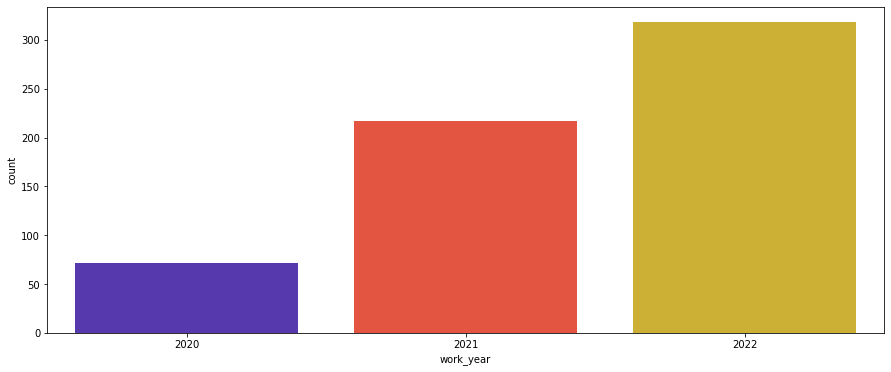

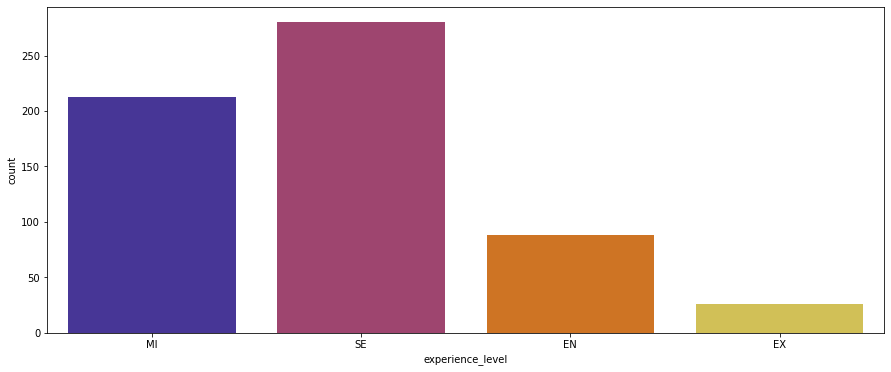

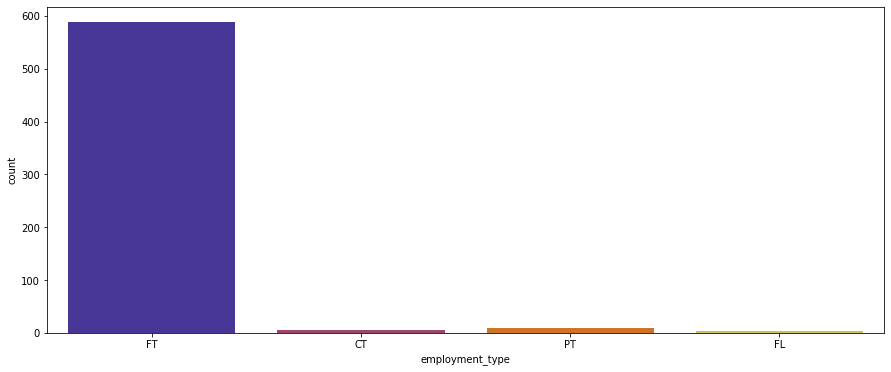

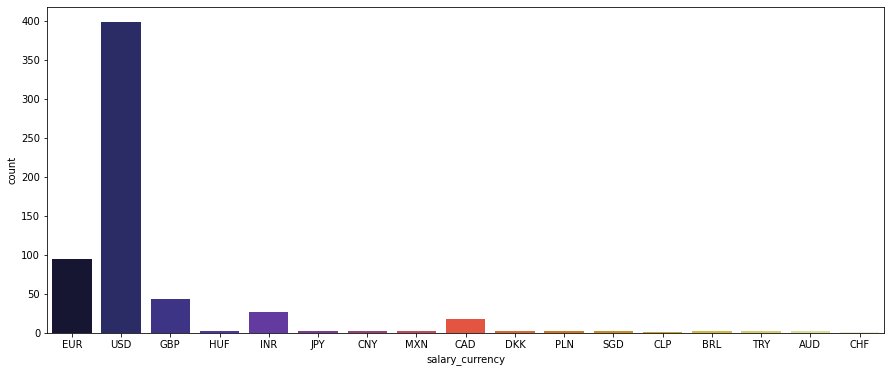

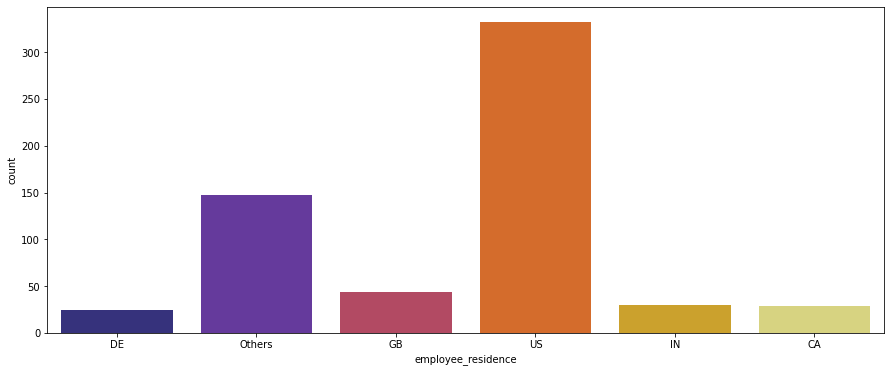

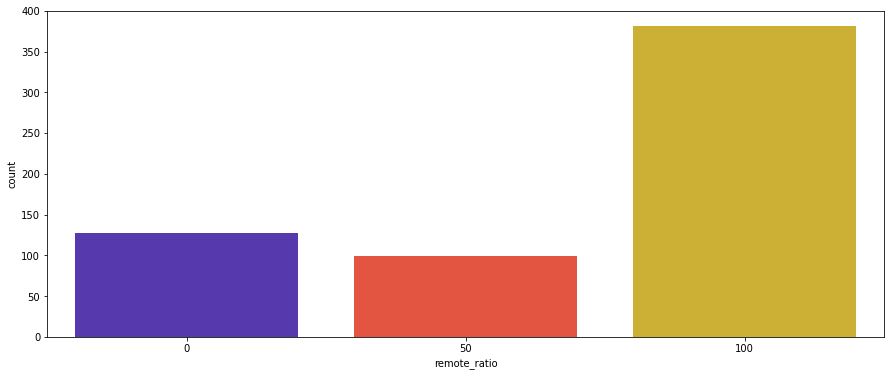

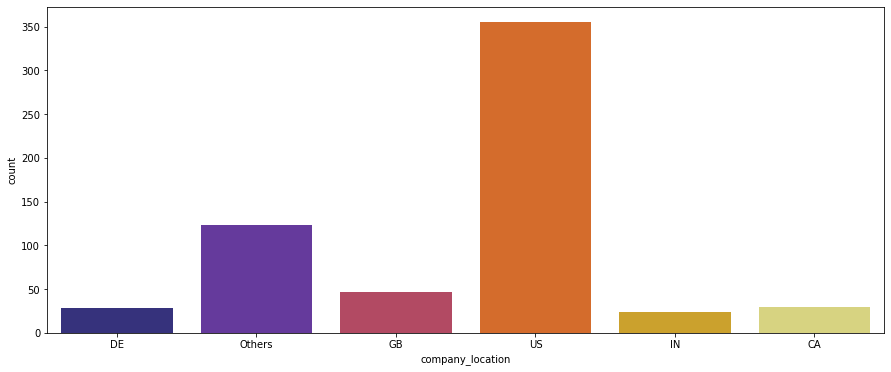

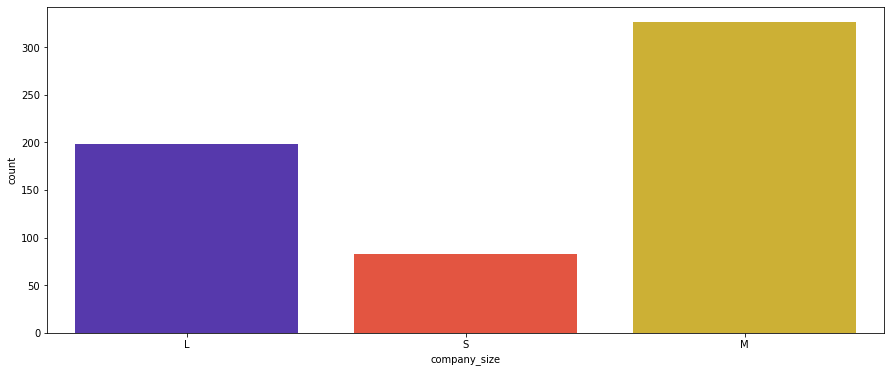

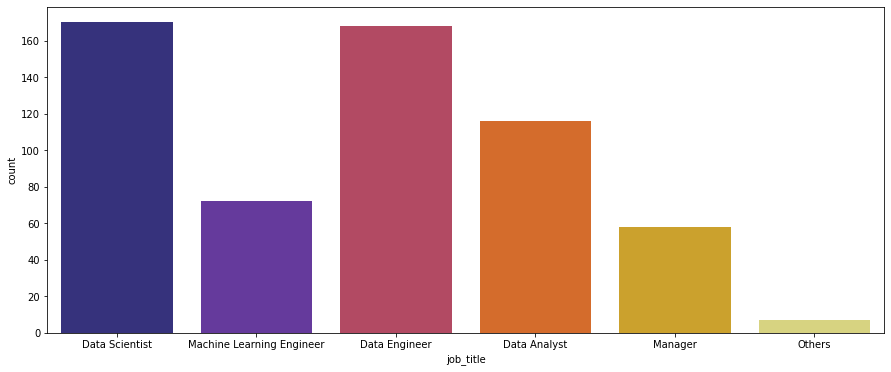

In [27]:
col = ['work_year','experience_level','employment_type','salary_currency','employee_residence','remote_ratio','company_location','company_size','job_title']

for i in col:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(x=i,data = df,palette='CMRmap')

Observations:
1. In 2022, The count of work is higher than the previous year
2. Most of the people who are working are from US as most of the companies are in US only.
3. Employees have been working as full time more than any role.
4. Majority of companies are medium level
5. Looks like most of the companies are flexible as most of them have high remote ratio

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

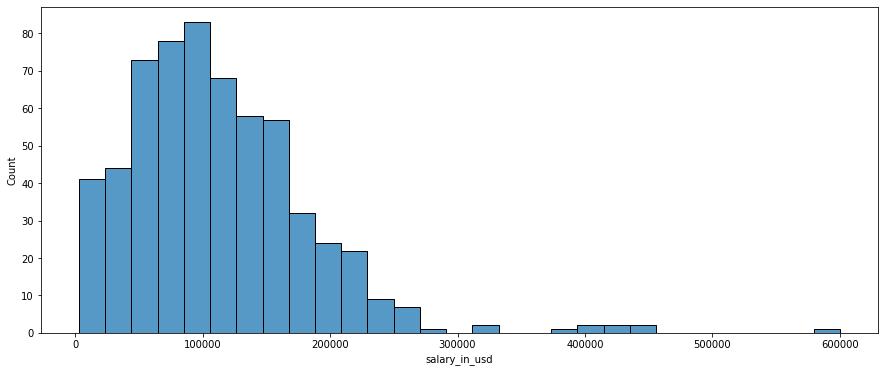

In [28]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
sns.histplot(x = df['salary_in_usd'], kde = False)

## BI-VARIATE ANALYSIS

### RELATION BTW REMOTE RATIO AND COMPANY SIZE

<AxesSubplot:xlabel='remote_ratio', ylabel='count'>

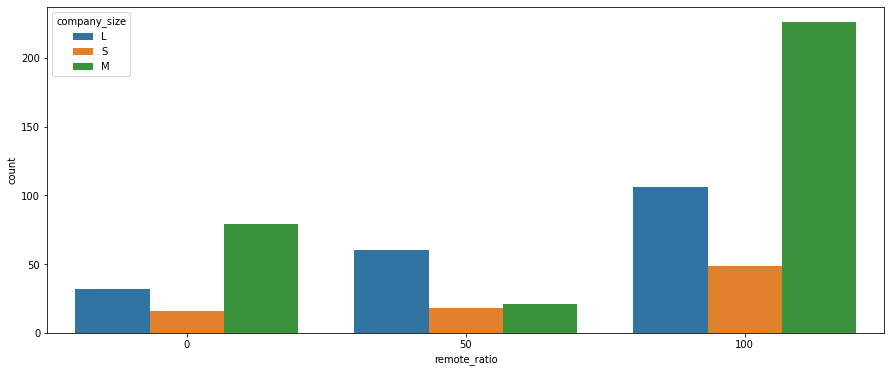

In [29]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='remote_ratio',hue='company_size',data = df)

### Relation between job title and salary

<AxesSubplot:xlabel='job_title', ylabel='salary_in_usd'>

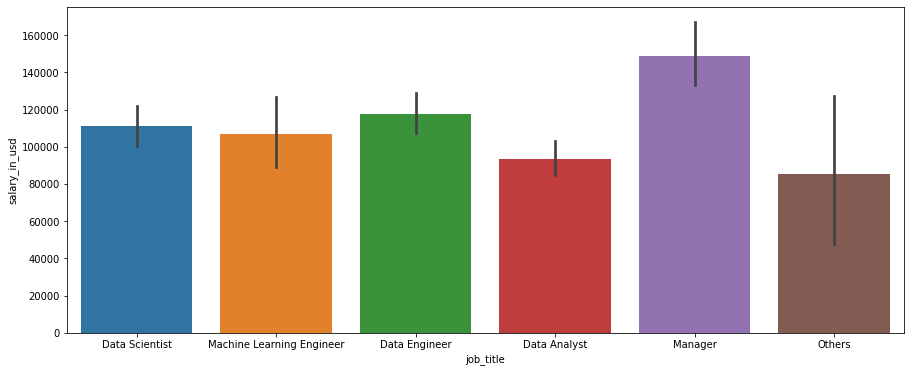

In [30]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=df['job_title'],y=df['salary_in_usd'])

### Relation between experience level and salary

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

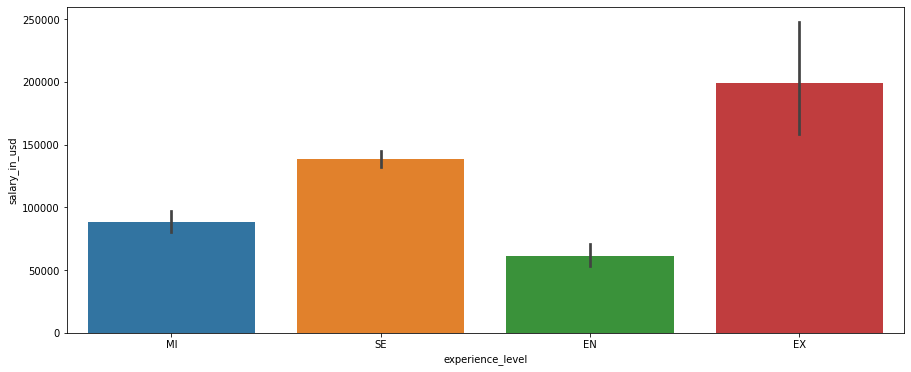

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=df['experience_level'],y=df['salary_in_usd'])

### Relation Between experience and company location

<AxesSubplot:xlabel='experience_level', ylabel='count'>

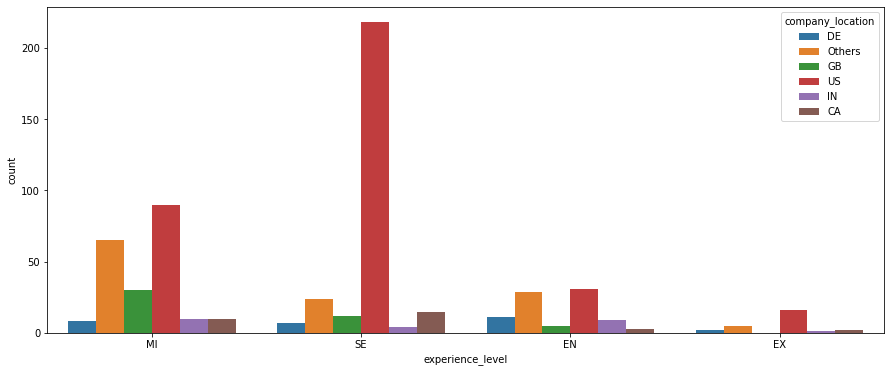

In [32]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x = 'experience_level', hue = 'company_location', data = df)

## relation between employee residence and salary

<AxesSubplot:xlabel='employee_residence', ylabel='salary_in_usd'>

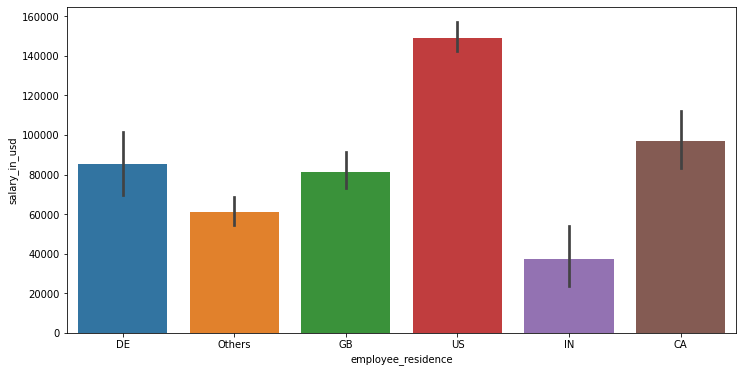

In [33]:
fig,ax = plt.subplots(figsize =(12,6))
sns.barplot(x = 'employee_residence', y = 'salary_in_usd', data = df)

### relation between company size and salary

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

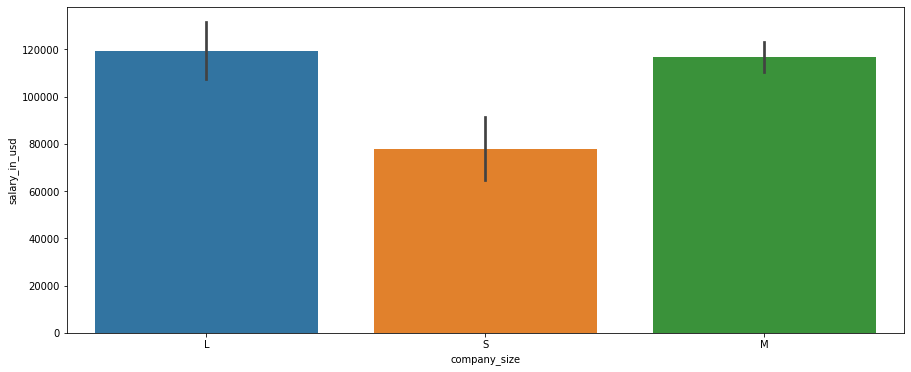

In [34]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=df['company_size'],y=df['salary_in_usd'])

## MULTI-VARIATE ANALYSIS

### Relation among experience level, salary and company size.

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

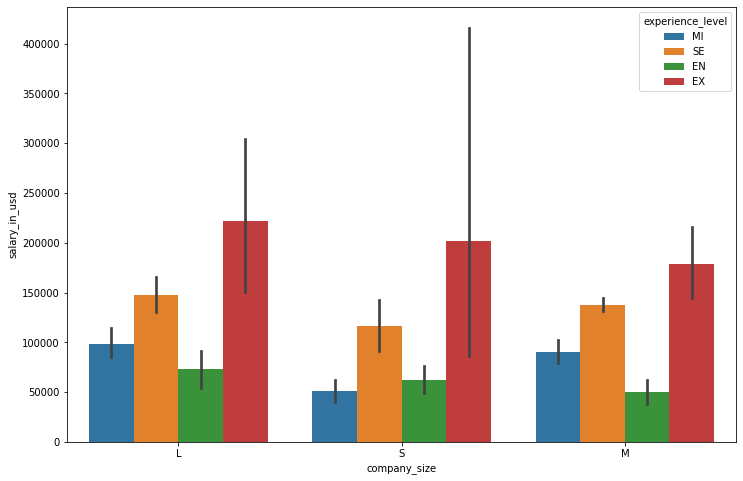

In [38]:
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=df['company_size'],y=df['salary_in_usd'],hue=df['experience_level'])

### Relation among job title, experience level and salary.

<AxesSubplot:xlabel='job_title', ylabel='salary_in_usd'>

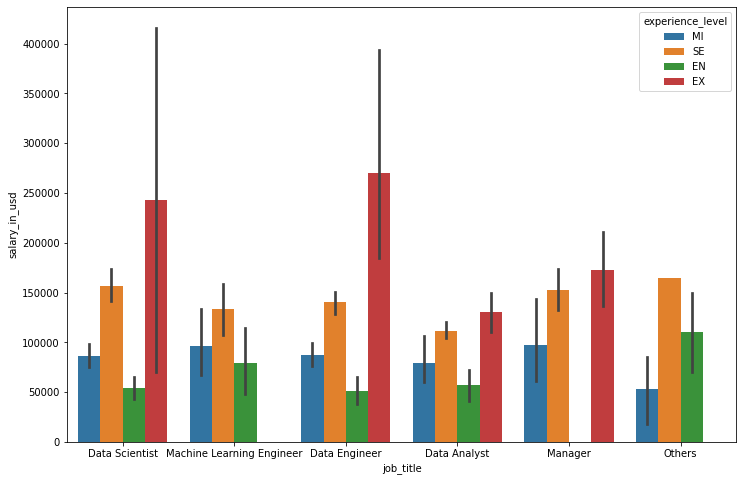

In [39]:
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x='job_title',y='salary_in_usd',hue='experience_level',data = df )

## FINAL CONCLUSION


#### 1.Experience level plays a significant role on salary.

#### 2.Among job titles Manager are paid more compared to other job titles.

#### 3.Majority of data points are from US and hence it becomes a little difficult to do any analysis based on location